In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')

In [3]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [4]:
train_data.dropna(inplace=True)

In [5]:
data = train_data.copy()

In [6]:
def change_into_datetime(col):
   data[col]= pd.to_datetime(data[col])


In [7]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

/home/zain/miniconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/zain/miniconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/zain/miniconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/zain/miniconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY form

In [8]:
data['journey_day']=data['Date_of_Journey'].dt.day
data['journey_month'] = data['Date_of_Journey'].dt.month
data['journey_year'] = data['Date_of_Journey'].dt.year

In [9]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-20 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-20 05:50:00,2022-07-20 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [10]:
data.drop('Date_of_Journey', axis=1, inplace = True)

In [11]:
def extract_hour_min(df, col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col, axis=1, inplace=True)
    return df.head(2)

In [12]:
extract_hour_min(data, 'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-20 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [13]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [14]:
def flight_dep_time(x):
    if (x> 4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Noon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

In [15]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

In [16]:
def preproccess_duration(x):
    if 'h' not in x:
        x= '0h '+ x
    elif 'm' not in x:
        x=x+ ' 0m'
    return x 

data['Duration'].apply(preproccess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [17]:
data['Duration']= data['Duration'].apply(preproccess_duration)
int(data['Duration'][0].split(' ')[0][0:-1])
data['Duration'][0].split(' ')[1][0:-1]
data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: int64

In [18]:
data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration, Length: 10682, dtype: int64

In [19]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [20]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,445


In [21]:
data.drop(columns=['Additional_Info', 'Route', 'Duration_total_mins', 'journey_year'], axis = 1, inplace = True)

In [22]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35


In [23]:
cat_col= [col for col in data.columns if data[col].dtype == 'object']
num_col= [col for col in data.columns if data[col].dtype != 'object']

In [24]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [25]:
for category in data['Source'].unique():
    data['Source'+ category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [26]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [27]:
dict1 = {key:index for index,key in enumerate(airlines,0)}

In [28]:
data['Airline'] = data['Airline'].map(dict1)

In [29]:
data['Destination'].replace('New Delhi','Delhi', inplace=True )

In [30]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
dict2 = {key:index for index,key in enumerate(dest,0)}
data['Destination'] = data['Destination'].map(dict2)

In [31]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,18,5,23,30,0,1,0,0,0
4,3,Banglore,2,4h 45m,1 stop,13302,3,1,16,50,21,35,1,0,0,0,0


In [32]:
data['Total_Stops'].unique()
stops = {
    'non-stop':0,
    '2 stops':2,
    '1 stop':1,
    '3 stops':3,
    '4 stops':4
    }

data['Total_Stops']= data['Total_Stops'].map(stops)

In [33]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,1,0,0,0,0


In [34]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

In [35]:
data.drop(columns=['Source','Duration'], axis=1, inplace=True)

In [36]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897.0,24,3,22,20,1,10,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,0,1,0,0,0


In [40]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'journey_day',
       'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'SourceBanglore',
       'SourceKolkata', 'SourceDelhi', 'SourceChennai', 'SourceMumbai'],
      dtype='object')

1. heatmap
2. Feature importance 
3. Select K best

In [42]:
X = data.loc[:, ['Airline', 'Destination', 'Total_Stops', 'journey_day',
       'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'SourceBanglore',
       'SourceKolkata', 'SourceDelhi', 'SourceChennai', 'SourceMumbai']]

In [43]:
X.head()

,Airline,Destination,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,24,3,22,20,1,10,1,0,0,0,0
1,7,3,2,5,1,5,50,13,15,0,1,0,0,0
2,10,4,2,6,9,9,25,4,25,0,0,1,0,0
3,3,3,1,5,12,18,5,23,30,0,1,0,0,0
4,3,2,1,3,1,16,50,21,35,1,0,0,0,0


In [45]:
y = data.iloc[:,3]
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

Find correlation between independent and dependent attributes


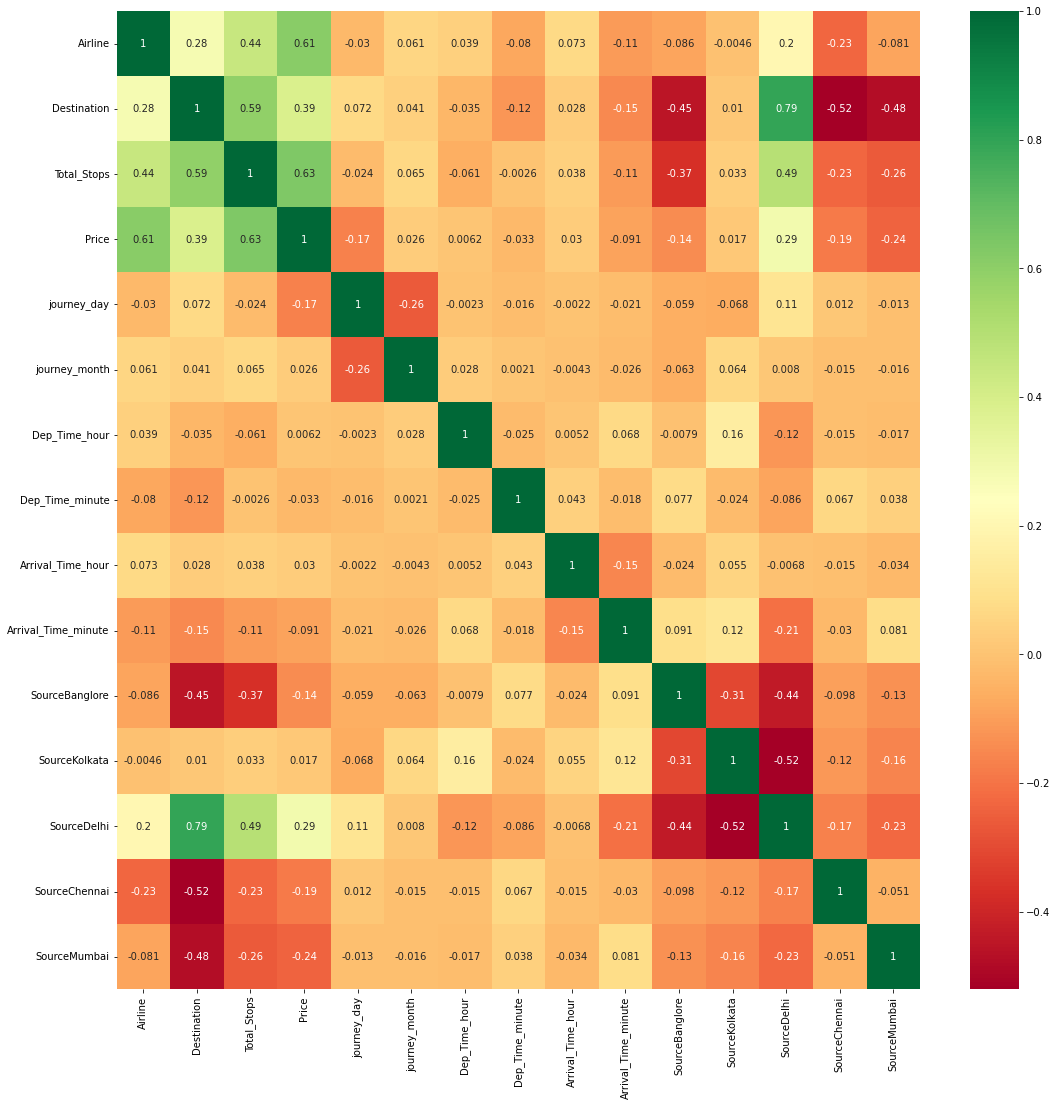

In [46]:
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [53]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
selection = DecisionTreeRegressor()
selection.fit(X,y)

DecisionTreeRegressor()

In [54]:
print(selection.feature_importances_)

[0.18154323 0.00790224 0.45607152 0.12973709 0.06383596 0.03828359
 0.02826796 0.04226971 0.02796214 0.00469803 0.00730559 0.00291374
 0.00146024 0.00774896]


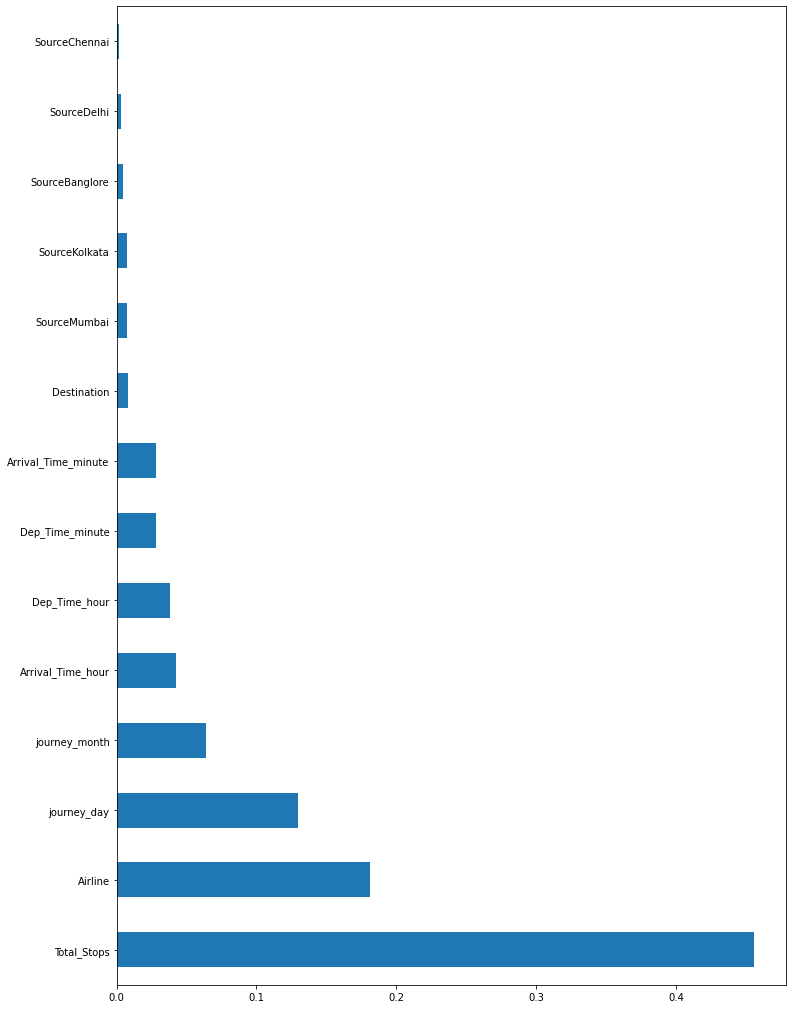

In [55]:
plt.figure(figsize = (12,18))
feat_importance = pd.Series(selection.feature_importances_, index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)

0.9499212120513087

In [65]:
reg_rf.score(X_test, y_test)

0.8205698356193751

0.8205698356193751

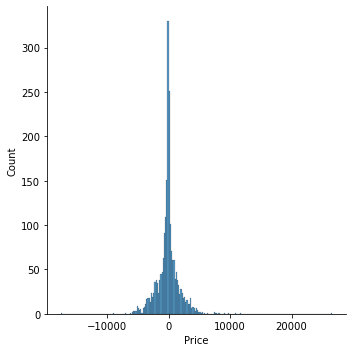

In [66]:
sns.displot(y_test-y_pred)
plt.show()

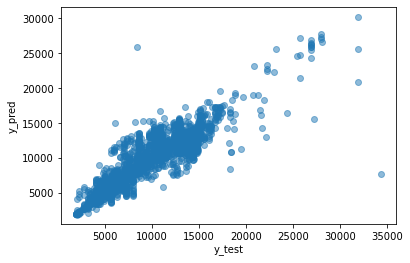

In [67]:
plt.scatter(y_test, y_pred, alpha = 0.5 )
plt.xlabel("y_test")
plt.ylabel('y_pred')
plt.show()

In [69]:
from sklearn import metrics

In [70]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1170.202225932532
MSE:  3612878.973264515
RMSE:  1900.7574735521928


In [71]:
metrics.r2_score(y_test, y_pred)

0.8205698356193751

Hypertuning Paramaters



In [72]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop =1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf= [1,2,5,10]

In [73]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split, 
    'min_samples_leaf': min_samples_leaf,
}

In [75]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose =2)

In [76]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   8.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   7.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   8.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   8.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   8.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   4.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   4.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [77]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 25}